In [1]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# HOMEWORK 1
## Q1

For this question, you are going to use [World Bank's Climate Change Knowledge Portal](https://climateknowledgeportal.worldbank.org/).

The Mediterranean Sea is bordered by following 22 countries: Spain, France, Monaco, Italy, Slovenia, Croatia, Bosnia and Herzegovina, Montenegro, Albania, Greece, Turkey, Syria, Lebanon, Israel, Palestine, Egypt, Libya, Tunisia, Algeria, Morocco, Malta, and Cyprus. Using the World Bank's Climate Change Knowledge Portal, obtain the following data through their API:

- Monthly average surface temperatures
- Monthly average precipitation

Gather this information as a time series from 1950 to 2020 for all countries surrounding the Mediterranean Sea. Conduct the following analyses on the retrieved data:

1. Compute the average surface temperature per month for each country, save the results in a pandas data frame called `MAST`, and display the data using a line plot.
2. Compute the average precipitation per month for each country, save the results in a pandas data frame called `MAPR`, and display the data using a line plot.
3. Compute the average surface temperature per annum for each country, save the results in a pandas data frame called `YAST`, and display the data using a line plot.
4. Compute the average precipitation per annum for each country, save the results in a pandas data frame called `YAPR`, and display the data using a line plot.

## Q1- ANSWER

First of all, i keep the names of countries and their codes in a dict in order to use it in api and later times.

In [2]:
countries = {
    'Spain': 'ESP',
    'France': 'FRA',
    'Monaco': 'MCO',
    'Italy': 'ITA',
    'Slovenia': 'SVN',
    'Croatia': 'HRV',
    'Bosnia and Herzegovina': 'BIH',
    'Montenegro': 'MNE',
    'Albania': 'ALB',
    'Greece': 'GRC',
    'Turkey': 'TUR',
    'Syria': 'SYR',
    'Lebanon': 'LBN',
    'Israel': 'ISR',
    'Palestine': 'PSE',
    'Egypt': 'EGY',
    'Libya': 'LBY',
    'Tunisia': 'TUN',
    'Algeria': 'DZA',
    'Morocco': 'MAR',
    'Malta': 'MLT',
    'Cyprus': 'CYP'
}
country_codes = ','.join(countries.values())
country_names = ','.join(countries.keys())


### API Request
I use the website (https://climateknowledgeportal.worldbank.org/download-data) for learning the form of the api.In website max 3 countries can be selected. So i write my own api.

In [3]:
api_url = f'https://cckpapi.worldbank.org/cckp/v1/era5-x0.5_timeseries_pr,tas_timeseries_monthly_1950-2020_mean_historical_era5_era5_mean/{country_codes}?_format=json'

(I used ChatGpt for below, it is in the file 'HW1_ChatGPT.md' which is under the HW1 folder)

In [4]:
try:
    # Send a GET request to the API
    response = requests.get(api_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # The response content will contain the data you requested
        data = response.json()  # or response.text if the response is in plain text
    else:
        # Print an error message for non-200 status codes
        print(f"Request failed with status code {response.status_code}")
except Exception as e:
    # Handle any exceptions that may occur during the request
    print(f"An error occurred: {str(e)}")

### Data Manipulation
I converted the data to dataframe in order to do manipulations easier , also kept precipidation and temperature datas in different dataframes.


In [5]:
df = pd.DataFrame(data)
prec_df = pd.DataFrame(df['data']['pr'])
temp_df = pd.DataFrame(df['data']['tas'])

Date information was in index column. Thus, i take them, converted to datetime format, and add as a new column, also reset the index columns.

In [6]:
prec_df['date'] = pd.to_datetime(prec_df.index)
prec_df = prec_df.reset_index(drop=True)
temp_df['date'] = pd.to_datetime(temp_df.index)
temp_df = temp_df.reset_index(drop=True)

### Data Analysis

I need to do grouping and calculating the mean values multiple times. So i defined a function called 'group_and-mean' in order to group the dataframe by selected parameter and returning a new dataframe with mean values.

In [7]:
def group_and_mean (df,group_par):
    """ Takes a dataframe, group by parameter and calculate mean
      Parameters:
        df: Dataframe
        group_par: Parameter to be grouped  
      Returns:
        grouped_df: Dataframe with mean values of groupes
    """
    grouped_df = df.groupby([group_par]).mean()
    return grouped_df

In [8]:
MAPR = group_and_mean(prec_df,prec_df['date'].dt.month) #the average precipitation per month for each country
MAST = group_and_mean(temp_df,temp_df['date'].dt.month) #the average surface temperature per month for each country
YAST = group_and_mean(temp_df,temp_df['date'].dt.year) #the average surface temperature per annum for each country
YAPR = group_and_mean(prec_df,prec_df['date'].dt.year) #the average precipitation per annum for each country

### Data Visualization

As understanding the plot with 22 countries would be difficult, i grouped the countries by continent.

In [9]:
europian_countries = ['ESP', 'FRA', 'ITA', 'MLT', 'MCO', 'SVN', 'HRV', 'BIH', 'MNE', 'ALB', 'GRC']
middle_east_countries = ['TUR', 'CYP', 'SYR', 'LBN', 'ISR', 'PSE']
northern_african_countries = ['EGY', 'MAR', 'DZA', 'TUN', 'LBY']

To make easier to plot, i defined the function called 'show_lineplot' which takes the DataFrame and title as an argument, and display a lineplot with figsize = (20,10), legend at upper right corner and title.

In [10]:
def show_lineplot(df, plot_title=False):
    df.plot(figsize=(20,8))    
    plt.legend(loc='upper right')
    if plot_title:
        plt.title(plot_title,fontsize=16);

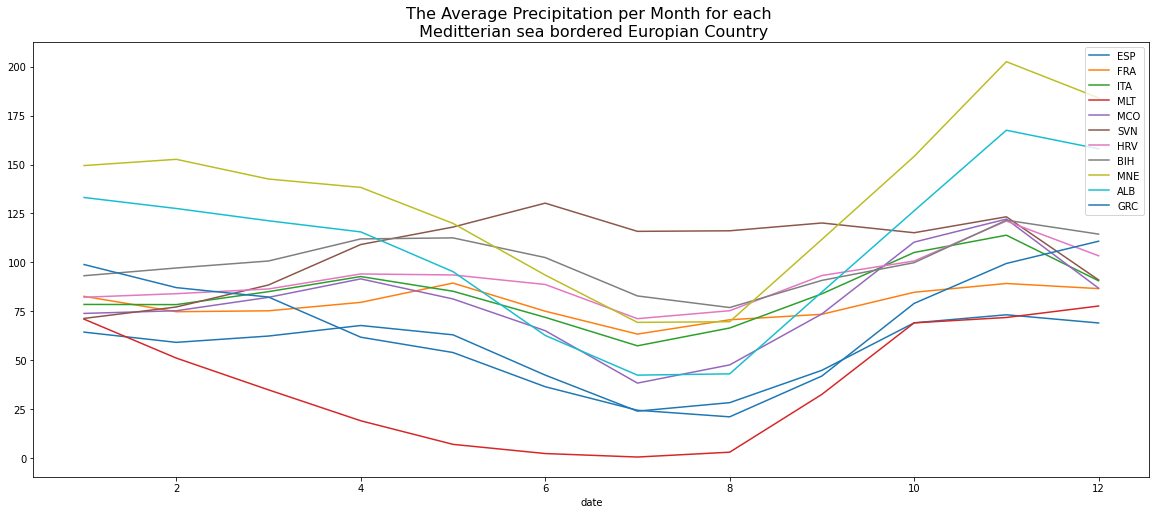

In [11]:
show_lineplot(MAPR[europian_countries],'The Average Precipitation per Month for each \n Meditterian sea bordered Europian Country')

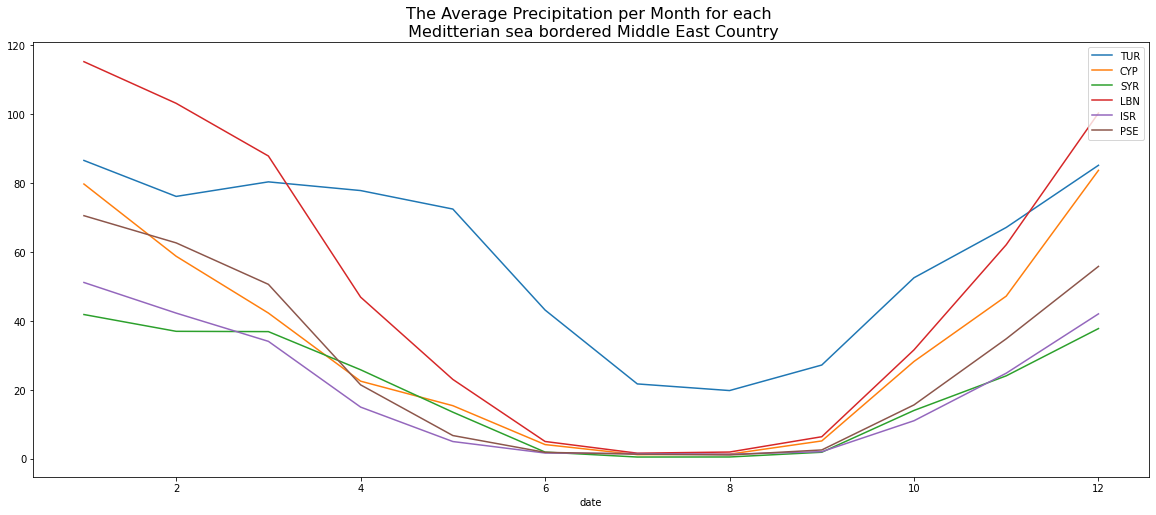

In [12]:
show_lineplot(MAPR[middle_east_countries],'The Average Precipitation per Month for each \n Meditterian sea bordered Middle East Country')
    

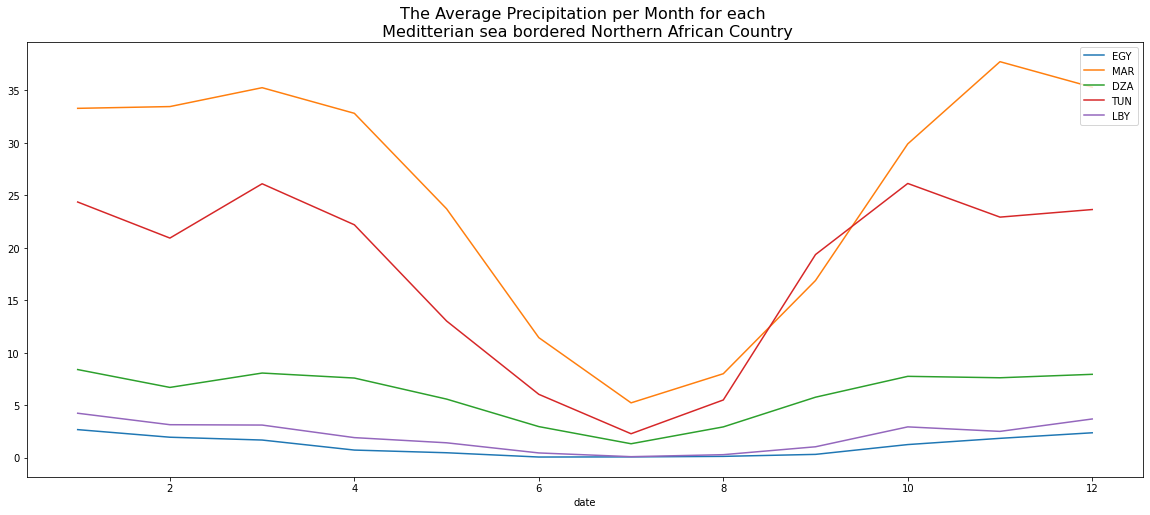

In [13]:
show_lineplot(MAPR[northern_african_countries],'The Average Precipitation per Month for each \n Meditterian sea bordered Northern African Country')

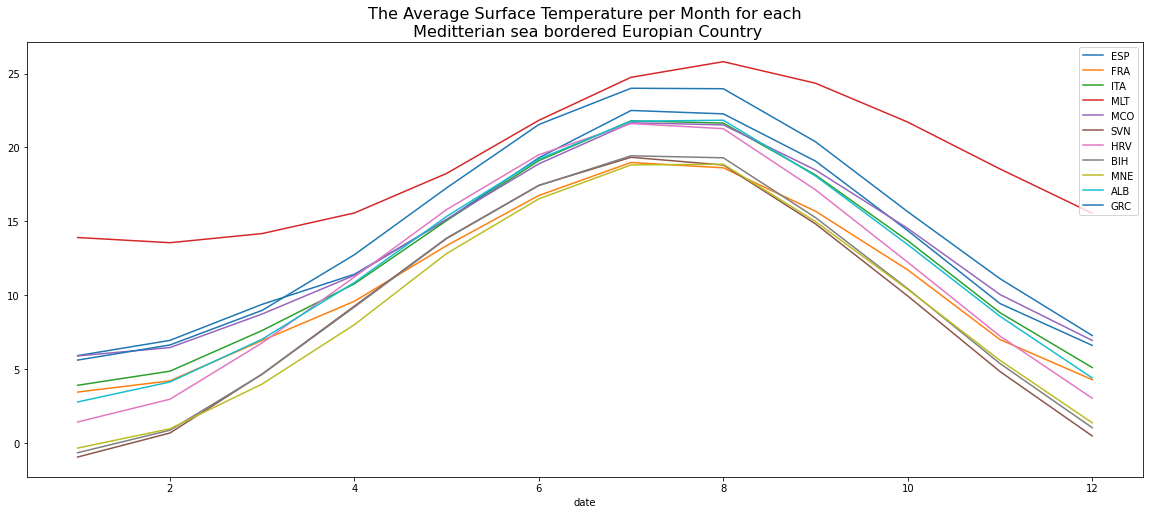

In [14]:
show_lineplot(MAST[europian_countries],'The Average Surface Temperature per Month for each\n Meditterian sea bordered Europian Country')


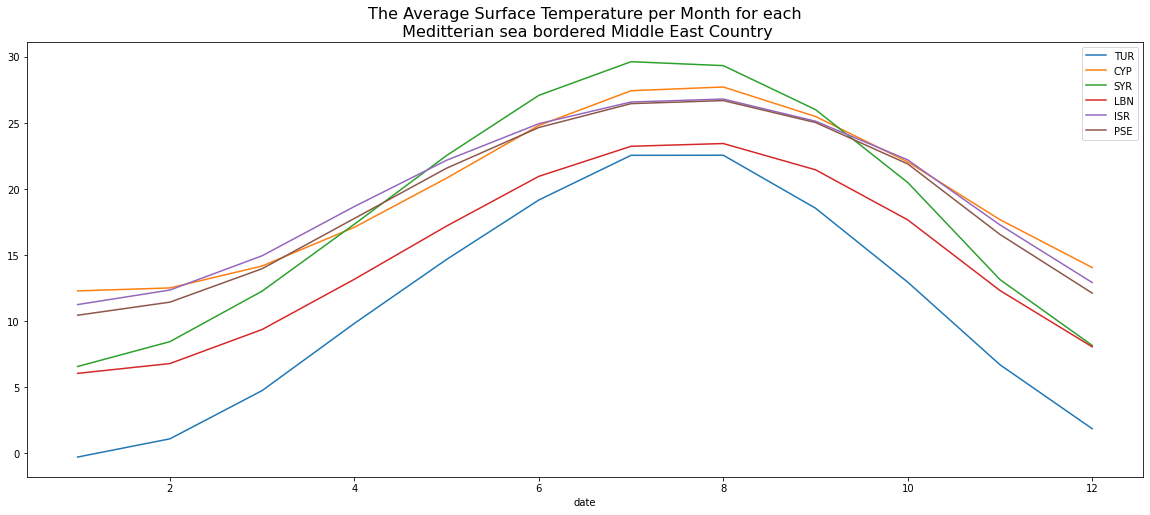

In [15]:
show_lineplot(MAST[middle_east_countries],'The Average Surface Temperature per Month for each\n Meditterian sea bordered Middle East Country')

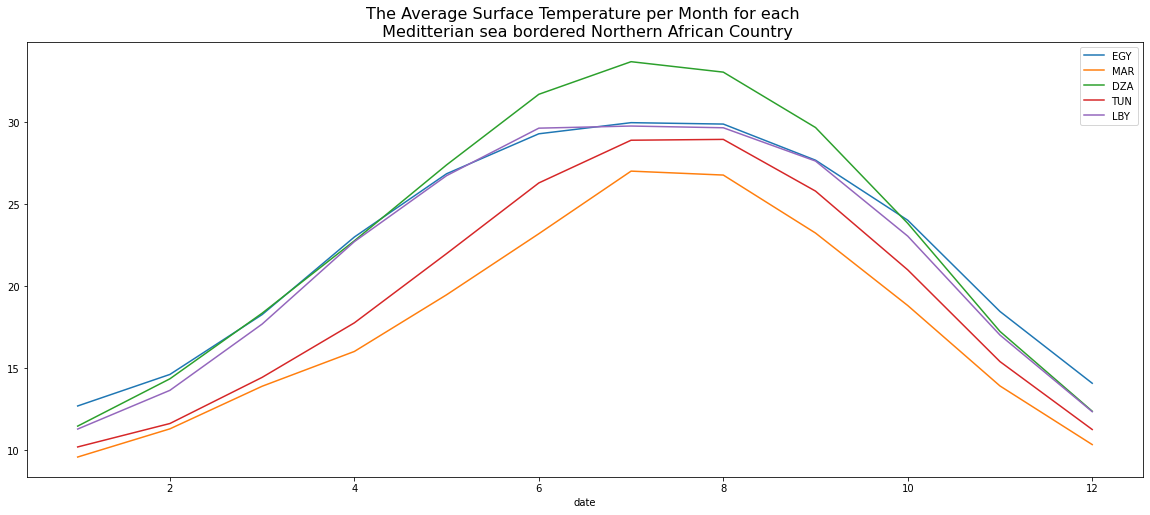

In [16]:
show_lineplot(MAST[northern_african_countries],'The Average Surface Temperature per Month for each \n Meditterian sea bordered Northern African Country')

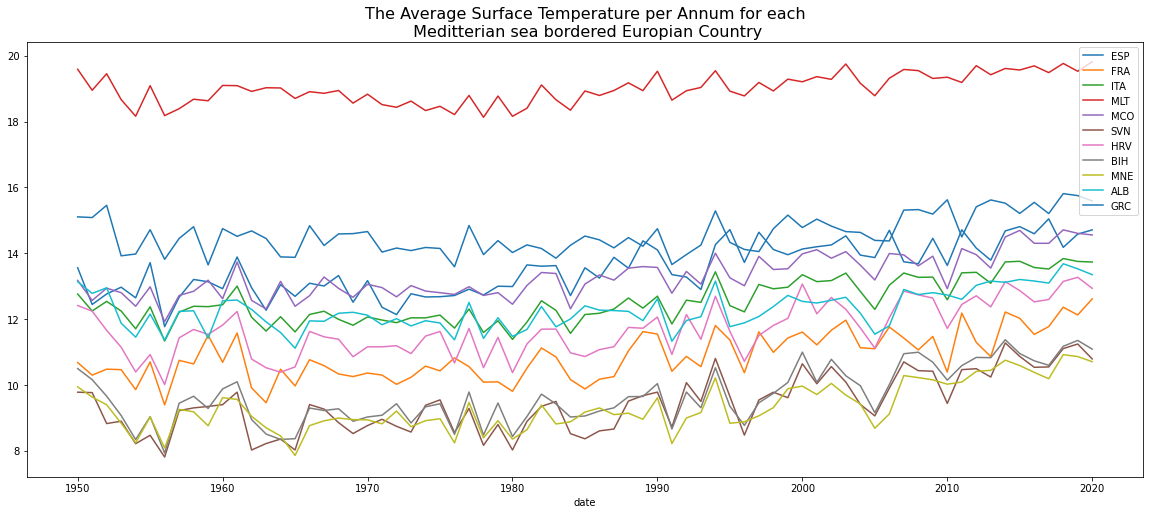

In [17]:
show_lineplot(YAST[europian_countries],'The Average Surface Temperature per Annum for each\n Meditterian sea bordered Europian Country')

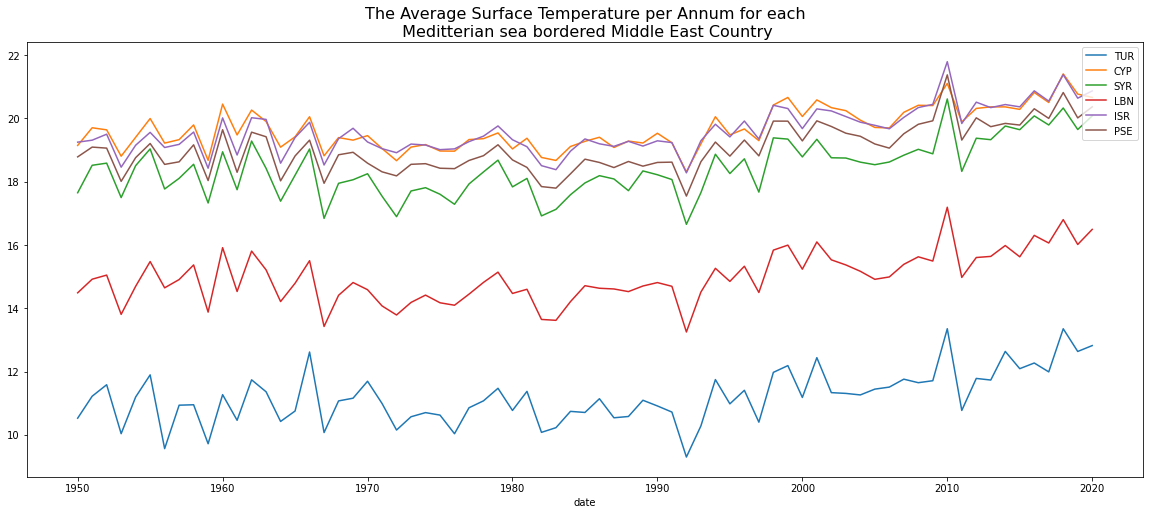

In [18]:
show_lineplot(YAST[middle_east_countries],'The Average Surface Temperature per Annum for each\n Meditterian sea bordered Middle East Country')

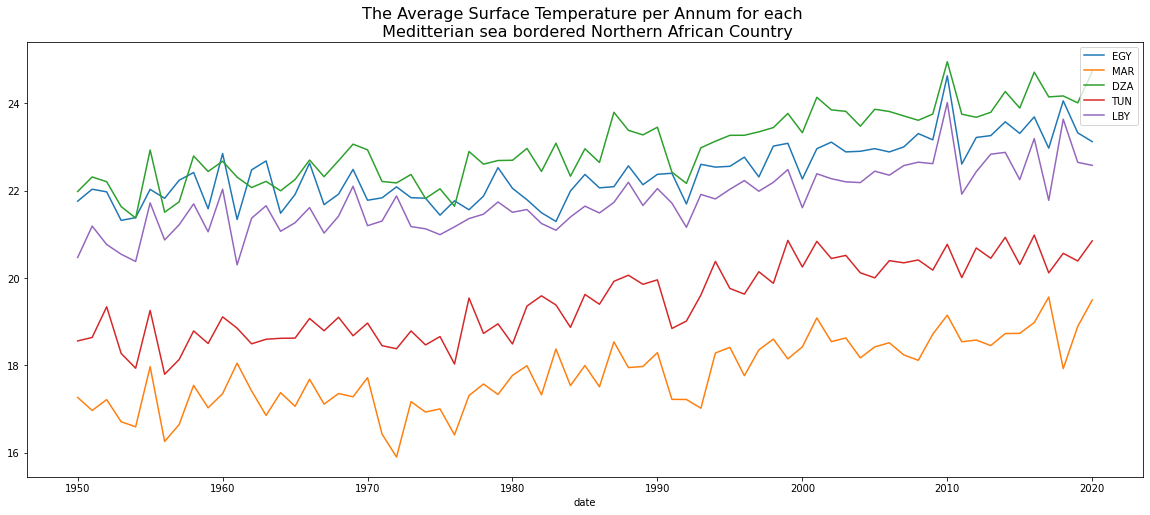

In [19]:
show_lineplot(YAST[northern_african_countries],'The Average Surface Temperature per Annum for each \n Meditterian sea bordered Northern African Country')

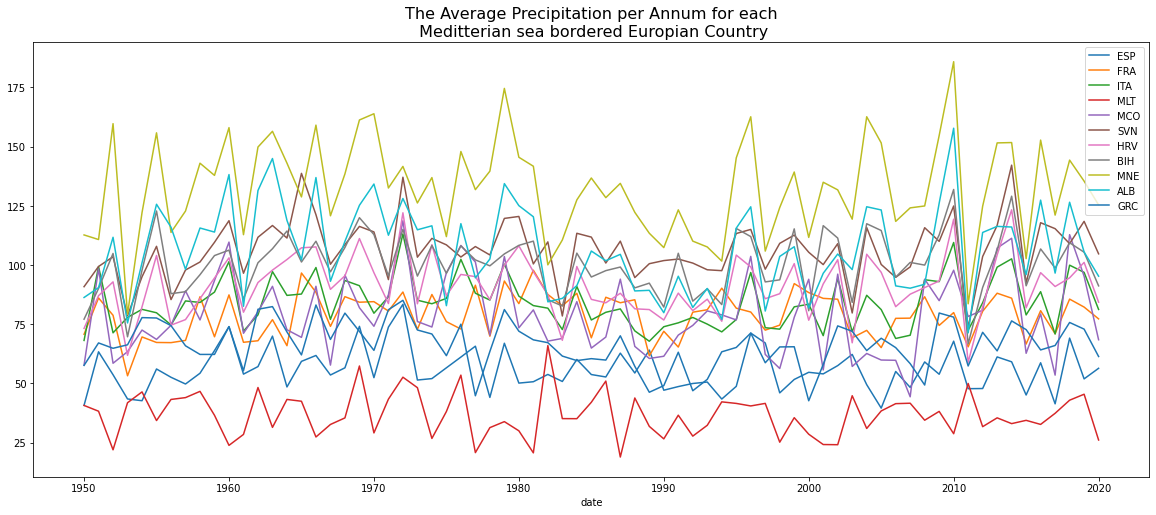

In [20]:
show_lineplot(YAPR[europian_countries],'The Average Precipitation per Annum for each\n Meditterian sea bordered Europian Country')

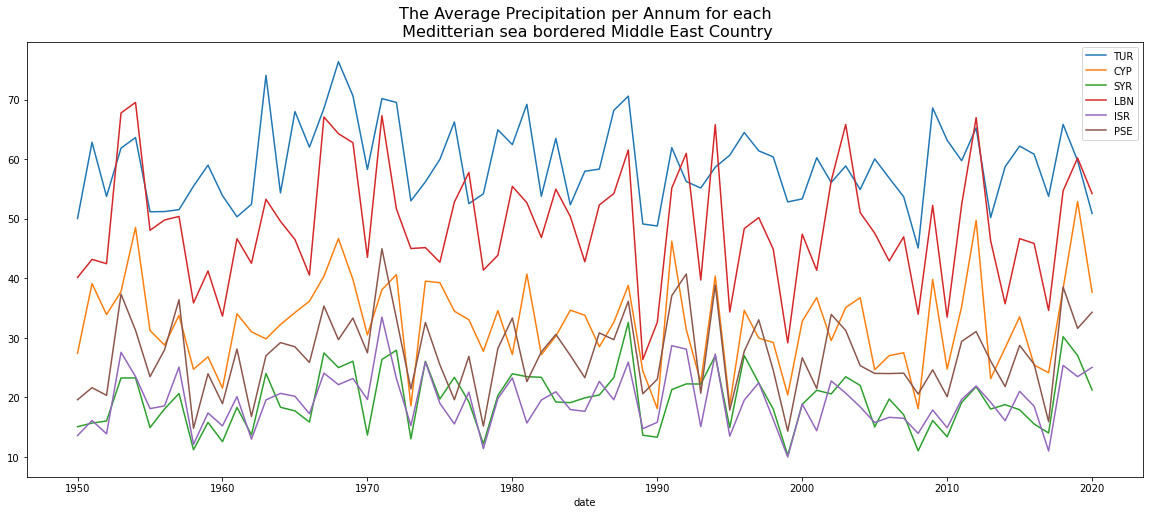

In [21]:
show_lineplot(YAPR[middle_east_countries],'The Average Precipitation per Annum for each\n Meditterian sea bordered Middle East Country')

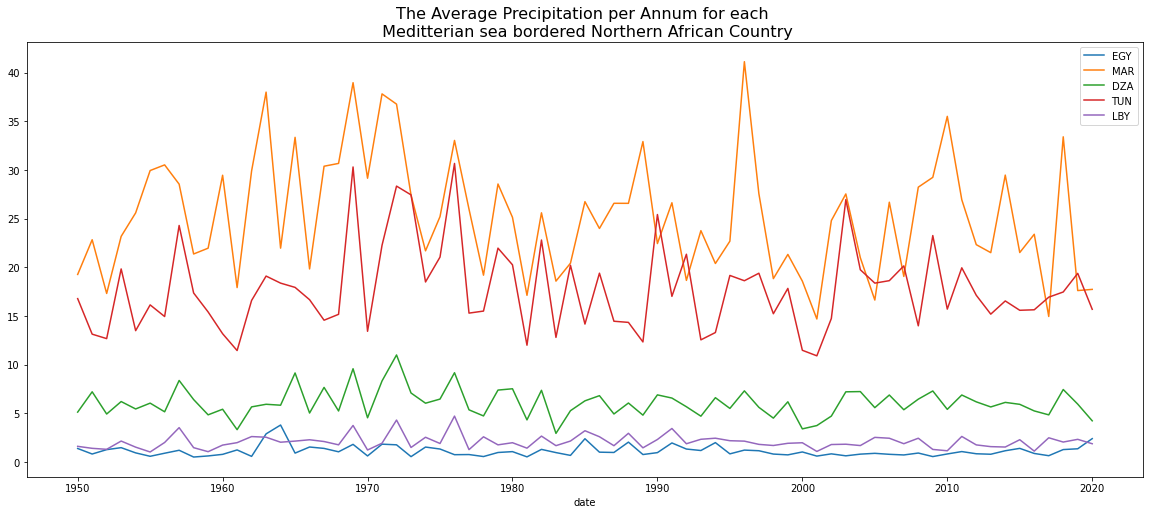

In [22]:
show_lineplot(YAPR[northern_african_countries],'The Average Precipitation per Annum for each \n Meditterian sea bordered Northern African Country')

## Q2

For this question, you are going to use [yfinance](https://pypi.org/project/yfinance/) library to access [Yahoo! Finance Data](https://finance.yahoo.com/).

Using the `yfinance` library, obtain the stock prices of the following companies between January 1st, 2019 and December 31st, 2022: Alphabet (Google), Meta (Facebook), Cisco, Intel, AMD, Qualcomm, Apple, Samsung, Xiaomi, and Tesla.

1. Construct a pandas data frame `CHANGE` containing values of $-1$, $0$, or $1$ for each trading day within the specified time frame for each mentioned company. Assign a value of $0$ if the daily closing price change is within $\pm 2.5\%$ of the opening price. If the change is greater than $2.5\%$ of the opening price, assign a value of $1$. If the change is less than $-2.5\%$, assign a value of $-1$.
2. Identify the longest continuous time intervals during which the `CHANGE` consistently remains $1$ and $-1$ for each company.
3. Create another pandas data frame `DIFFERENCE` consisting of values $-1$, $0$, or $1$ for each day within the specified time period (excluding January 1st, 2019). If the opening price of a day is within $\pm 2.5\%$ of the previous day's opening price, assign a value of $0$. If the change in the opening price in comparison to the previous day is greater than $2.5\%$, assign a value of $1$. If the change in the opening price is less than $-2.5\%$, assign a value of $-1$.
4. Determine the longest continuous time intervals during which the `DIFFERENCE` consistently remains $1$ and $-1$ for each company.

## Q2-ANSWER

### Import related data

First of all, i obtained the stock prices of requested companies between January 1st, 2019 and December 31st, 2022(As there is no data at 2019-01-01,df starts from 2019-01-02).

In [10]:
y_df = yf.download("GOOG META CSCO INTC AMD QCOM TSLA SMSN.IL XIACY AAPL ", start= '2019-01-01',end= '2022-12-31')

[*********************100%%**********************]  10 of 10 completed


In [11]:
y_df.head()

Adj Close                                                          \
                 AAPL        AMD       CSCO       GOOG       INTC        META   
Date                                                                            
2019-01-02  37.845039  18.830000  36.324745  52.292500  40.940693  135.536194   
2019-01-03  34.075397  17.049999  35.003685  50.803001  38.688427  131.600372   
2019-01-04  35.530060  19.000000  36.580406  53.535500  41.062439  137.803787   
2019-01-07  35.450966  20.570000  36.827583  53.419498  41.253754  137.903687   
2019-01-08  36.126766  20.750000  37.125885  53.813999  41.514633  142.378937   

                                                     ...       Volume  \
                 QCOM     SMSN.IL       TSLA  XIACY  ...         AAPL   
Date                                                 ...                
2019-01-02  50.268047  767.851074  20.674667  7.785  ...  148158800.0   
2019-01-03  48.779270  738.048645  20.024000  7.430  ...  365248800.0   
2019-01-04  49.567459  748.128906  21.179333  7.790  ...  234428400.0   
2019-01-07  49.427330  759.523987  22.330667  7.690  ...  219111200.0   
2019-01-08  48.998215  733.665955  22.356667  7.200  ...  164101200.0   

                                                                         \
                    AMD        CSCO        GOOG        INTC        META   
Date                                                                      
2019-01-02   87148700.0  23833500.0  30652000.0  18774600.0  28146200.0   
2019-01-03  117277600.0  29606700.0  36822000.0  32267300.0  22717900.0   
2019-01-04  111878600.0  27515000.0  41878000.0  35447300.0  29002100.0   
2019-01-07  107157000.0  19488100.0  39638000.0  22736800.0  20089300.0   
2019-01-08  121271000.0  22071400.0  35298000.0  22749200.0  26263800.0   

                                                       
                  QCOM  SMSN.IL         TSLA    XIACY  
Date                                                   
2019-01-02   9896600.0  10930.0  174879000.0  17799.0  
2019-01-03  14422200.0  20639.0  104478000.0  10357.0  
2019-01-04  14177300.0  15405.0  110911500.0  13374.0  
2019-01-07  12352000.0  20873.0  113268000.0  25782.0  
2019-01-08  12110000.0  54749.0  105127500.0  39193.0  

[5 rows x 60 columns]

### Data Preprocessing

Before doing some calculations, in order to prevent potential errors, we should check null values :

In [12]:
y_df[['Open','Close']].isnull().sum()

Open   AAPL       23
       AMD        23
       CSCO       23
       GOOG       23
       INTC       23
       META       23
       QCOM       23
       SMSN.IL    21
       TSLA       23
       XIACY      23
Close  AAPL       23
       AMD        23
       CSCO       23
       GOOG       23
       INTC       23
       META       23
       QCOM       23
       SMSN.IL    21
       TSLA       23
       XIACY      23
dtype: int64

As we can see, there are Null values in our df. We should fill the null values. Let consider several approaches :

-We can easily fill them with zero but we will do some divisions and they may cause error.

-We can fill them with the mean value of related columns, but they might be affected from outliers.

-We can fill them with the median value of related columns.

Although I could fill with median values, I wanted to choose a different method.From computational math lecture, i learned the technic called 'interpolation'. After some research,i learned that pandas has a function for that(https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/).
 
 As the values are daily stock prices, there should not be too high difference between the values before and after a few days. Thus, interpoation will be the nice option for filling the missing values.

In [13]:
yf_df = y_df[['Open','Close']].interpolate(method='linear')

In [14]:
yf_df[['Open','Close']].isnull().sum().sum()

0

### Data Analysis

At first, we will calculate the change of closing price over the opening price:

In [15]:
daily_change = ((yf_df['Close']-yf_df['Open'])/yf_df['Open'])*100  #  % change of closing price relative to opening price

In [16]:
CHANGE = daily_change.copy() # to keep original data safe, copied to another variable.

In [17]:
CHANGE.head()

,AAPL,AMD,CSCO,GOOG,INTC,META,QCOM,SMSN.IL,TSLA,XIACY
Date,,,,,,,,,,
2019-01-02,1.956226,4.553024,1.584678,2.880275,2.436908,5.186438,2.135233,1.860465,1.313295,-1.580278
2019-01-03,-1.243224,-7.437572,-2.907800,-2.395769,-3.596966,-2.190212,-0.446828,0.357569,-2.162868,-1.654533
2019-01-04,2.580776,8.262113,2.556750,3.691684,3.010474,2.940081,0.176988,2.154399,3.820260,0.906738
2019-01-07,-0.517824,5.812753,0.816609,-0.290252,0.721869,0.356212,0.088667,0.057737,4.115384,-0.902064
2019-01-08,0.795669,-2.076454,-0.022948,0.015796,-0.125518,1.887197,-1.340149,-1.529412,-1.932973,-0.034711


We will examine the change of the closing price compared to the opening price:

Assigned a value of 0 if the daily closing price change is within [-2.5 %, 2.5 %] of the opening price, 

If the change is greater than 2.5 % of the opening price, assigned a value of 1,

If the change is less than -2.5 % , assigned a value of -1.

In [18]:
CHANGE[(daily_change <= 2.5) & (daily_change >=(-2.5))] = 0
CHANGE[daily_change > 2.5] = 1
CHANGE[daily_change < (-2.5)] = -1

In [19]:
CHANGE.head()

,AAPL,AMD,CSCO,GOOG,INTC,META,QCOM,SMSN.IL,TSLA,XIACY
Date,,,,,,,,,,
2019-01-02,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2019-01-03,0.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
2019-01-04,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
2019-01-07,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, we will identify the longest continuous time intervals during which the CHANGE consistently remains 1 and -1 for each company.
I defined a function called 'count_longest' which takes DataFrame, column name , and target value (1 or -1) as an argument and returns the longest continous time intervals for related values.

In [20]:
def count_longest (df, colname, target):
    """ Takes a dataframe, column name and target, finds the longest continous time interval for target values in selected column in df
      Parameters:
        df: Dataframe
        colname: one of the columns of related Dataframe
        target: the value that counted if continous  
      Returns:
        longest: Longest time intervals during the colname od df remains target (unit: day)
    """
    longest=1
    count=0
    data = df[colname]
    for i in range(len(data)):
        if data[i]==target:
            count=count+1
        else:
            if longest < count :   
                longest=count
            count=0
    return longest
        

In [21]:
longest_1 = [count_longest(CHANGE,i,1) for i in CHANGE] # longest interval for remaining 1
longest_minus1 = [count_longest(CHANGE,i,-1) for i in CHANGE] # longest time interval for remaining -1

In [22]:
longest_intervals_df =pd.DataFrame(data=[longest_1,longest_minus1],index=['longest time interval for 1 (by day)','longest time interval for -1 (by day)'],columns=CHANGE.columns).T

In [23]:
longest_intervals_df

,longest time interval for 1 (by day),longest time interval for -1 (by day)
AAPL,2,2
AMD,6,4
CSCO,2,2
GOOG,2,3
INTC,2,3
META,3,3
QCOM,5,3
SMSN.IL,2,1
TSLA,4,5
XIACY,3,3


Now, we will compare the opening prices with previous days:

Assigned a value of 0 if the opening price of a day is within [-2.5 %, 2.5 %] of the previous day's opening price, 

If the change in the opening price in comparison to the previous day is greater than 2.5 % of the opening price, assigned a value of 1,

If the change is less than -2.5 % , assigned a value of -1.

I defined the function called 'prev compare' which takes the DataFrame as parameter, implement the requirements above and return the DataFrame with assigned values.

In [38]:
def prev_compare (df):
    comparison_df = df.copy() #ratios calculated with values of df, and values will be assigned to comparion_df.
    change_df = df.pct_change()*100
    comparison_df[(change_df <= 2.5) & (change_df >=(-2.5))] = 0
    comparison_df[change_df > 2.5] = 1
    comparison_df[change_df < (-2.5)] = -1
    return comparison_df


In [39]:
open_prices = yf_df['Open']
open_prices

,AAPL,AMD,CSCO,GOOG,INTC,META,QCOM,SMSN.IL,TSLA,XIACY
Date,,,,,,,,,,
2019-01-02,38.722500,18.010000,42.279999,50.828499,45.959999,128.990005,56.200001,860.00,20.406668,7.9100
2019-01-03,35.994999,18.420000,42.299999,52.049999,46.150002,134.690002,55.950001,839.00,20.466667,7.5550
2019-01-04,36.132500,17.549999,41.849998,51.629501,45.840000,134.009995,56.500000,835.50,20.400000,7.7200
2019-01-07,37.174999,19.440001,42.860001,53.575001,47.099998,137.559998,56.389999,866.00,21.448000,7.7600
2019-01-08,37.389999,21.190001,43.570000,53.805500,47.799999,139.889999,56.709999,850.00,22.797333,7.2025
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,63.110001,47.250000,87.620003,25.920000,116.029999,109.699997,1127.50,126.370003,6.7700
2022-12-27,131.380005,63.869999,47.669998,89.309998,25.850000,117.930000,109.750000,1118.75,117.500000,6.8100
2022-12-28,129.669998,62.540001,47.689999,87.500000,25.840000,116.250000,108.870003,1110.00,110.349998,7.0800


In [40]:
DIFFERENCE = prev_compare(open_prices)
DIFFERENCE.head() # ignore 2019-01-02, if we would visualize we can delete this row

,AAPL,AMD,CSCO,GOOG,INTC,META,QCOM,SMSN.IL,TSLA,XIACY
Date,,,,,,,,,,
2019-01-02,38.7225,18.01,42.279999,50.828499,45.959999,128.990005,56.200001,860.0,20.406668,7.91
2019-01-03,-1.0000,0.00,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,-1.00
2019-01-04,0.0000,-1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00
2019-01-07,1.0000,1.00,0.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.00
2019-01-08,0.0000,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,-1.00


In [41]:
longest_diff_1 = [count_longest(DIFFERENCE,i,1) for i in DIFFERENCE] # longest interval for remaining 1
longest_diff_minus1 = [count_longest(DIFFERENCE,i,-1) for i in DIFFERENCE] # longest interval for remaining -1

In [42]:
longest_intervals_diff_df =pd.DataFrame(data=[longest_diff_1,longest_diff_minus1],index=['longest time interval for 1 (by day)','longest time interval for -1 (by day)'],columns=DIFFERENCE.columns).T
longest_intervals_diff_df

,longest time interval for 1 (by day),longest time interval for -1 (by day)
AAPL,2,4
AMD,4,5
CSCO,2,2
GOOG,3,3
INTC,3,3
META,3,3
QCOM,3,4
SMSN.IL,2,4
TSLA,5,5
XIACY,3,3
